In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from halp.undirected_hypergraph import UndirectedHypergraph
from halp.utilities import undirected_graph_transformations, undirected_matrices
import scipy
import time

## Constructing a Hypergraph from a random biparite network constructed via Preferential Attachment

This code is unfinished and hence was not fully discussed in the report. The reader is free to continue this line of research if they wish however note that the PA bipartite generator is far too slow to be of practical use!

### Simple Example

In [14]:
from networkx import bipartite

In [77]:
# degree sequence of nodes

N = 15
scale_factor = 0.2
deg_sequence = np.maximum(1, np.round(scale_factor*N*np.random.rand(N), 0).astype(int)) # each node has at least one connection

In [78]:
deg_sequence

array([1, 3, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 3, 2])

In [79]:
G = bipartite.preferential_attachment_graph(deg_sequence, 0.1) # this function is very slow

In [80]:
print("Number of hyperedges: " + str(G.number_of_nodes() - len(deg_sequence)))

Number of hyperedges: 6


In [81]:
nodes, hyperedges = nx.bipartite.sets(G)

In [82]:
nodes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [83]:
hyperedges

{15, 16, 17, 18, 19, 20}

In [84]:
# construct the biadjacency matrix <=> Incidence matrix of our hypergraph

I = bipartite.biadjacency_matrix(G, row_order = range(len(list(nodes)))).toarray()
I = np.minimum(I, 1) # remove the multiple loops as does not make sense in hypergraph scenario
I

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0]], dtype=int32)

In [85]:
# constructing the adjacency matrix

A = I @ I.T
A

array([[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2],
       [1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2],
       [1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 3, 1],
       [1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]], dtype=int32)

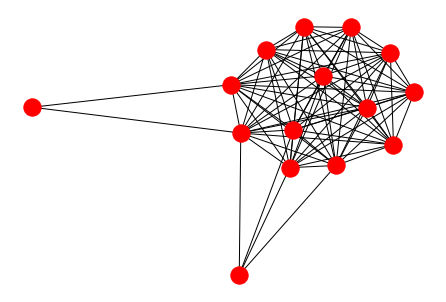

In [86]:
# Clique Projection of Hypergraph

nxgraph = nx.from_numpy_matrix(A)
nx.draw(nxgraph)

In [87]:
# hyper-edges matrix

C = I.T @ I
C

array([[13,  4,  2,  0,  2,  1],
       [ 4,  5,  1,  0,  0,  0],
       [ 2,  1,  3,  1,  0,  0],
       [ 0,  0,  1,  1,  0,  0],
       [ 2,  0,  0,  0,  2,  1],
       [ 1,  0,  0,  0,  1,  1]], dtype=int32)

In [88]:
# Computing centrality measures on a hypergraph defined by the incidence matrix I.

# Centrality measure functions


###########################################################################

# CEC functions

##########################################################################


def compute_cec_ranking_svd(A):
    # using best rank one approximation
    rank = 1

    # Perform SVD on im and obtain individual matrices
    P, D, Q = np.linalg.svd(A, full_matrices=True)
    
    return np.abs(P[:, :rank].T[0])


def compute_cec_ranking_power(A, num_sims):
    # implementing the power method
    # code altered from: https://en.wikipedia.org/wiki/Power_iteration
    b_k = np.random.rand(len(A))

    for _ in range(num_sims):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    return b_k


##########################################################################

# PageRank functions

##########################################################################

def power_iteration(A, num_simulations: int):

    # Code taken from "https://en.wikipedia.org/wiki/Power_iteration"
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1, 1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    return b_k

def hg_pagerank_power(T, alpha, num_sims):
    nodes = list(range(len(T)))
    n = len(nodes)

    T = alpha*T + (1-alpha)/n*np.ones((n,n)) # PageRank w/ teleportation
    
    res_pgrk = power_iteration(T.T, 100) # power method
    
    return res_pgrk

def hg_pagerank_full_eig_decomp(T, alpha):
    """
    
    Computes the pagerank for a Hypergraph H, for a random walk determined by transition matrix T.
    Computes by finding the left eigenvector associated to the eigenvalue \lambda = 1
    Does so by finding all eigenpairs of the matrix and then filtered
    (Takes long time for large matrices, see hg_pagerank_fast instead)
    
    """
    
    
    # p(t+1)_i = a * p(t)_i*T + (1-a)/n * 1
    
    nodes = list(range(len(T)))
    n = len(nodes)
    
    T = alpha*T + (1-alpha)/n*np.ones((n,n))
    
    # Find the right eigenvalue associated with the 1 eigenvalue (note the transpose of T)
    values, vectors = np.linalg.eig(T.T)
    vector = vectors[:,np.isclose(values, 1)] # find correct evector, code used from: 
    vector = vector[:,0]
    
    # normalise the stationary distribution
    stat_dist = vector / vector.sum()
    stat_dist = stat_dist.real
    
    
    #return the hypergraph PageRank
    return stat_dist


def find_pgrk(I, gamma, alpha):
    # compute the pagerank of the non-linear walker on hypergraph with incidence matrix I and bias parameter gamma
    
    # generate incidence matrix of hypergraph of N nodes, sqrt(N) hyperedges via E-R model
    
    # hyper-adjacency matrix
    A = I @ I.T
    # hyper-edges matrix
    C = I.T @ I
    
    # generate transition matrix for PageRank
    
    C_hat = np.diag(np.diag(C))

    K = np.zeros((len(A), len(A)))
    C_alt = np.diag(np.diag((C_hat - 1).astype(float)**gamma))
    C_alt = np.nan_to_num(C_alt, nan = 0, posinf = 0)

    K = (I @ C_alt @ I.T).astype(float)
    K = K - np.diag(np.diag(K)) # simple walk => remove diagonal entries


    T = np.zeros((len(A), len(A)))
    for i in range(len(A)):
        norm = np.sum(K[i])
        if norm ==0:
            pass
        else:
            T[i, :] = K[i] / norm
            
    res_pgrk = hg_pagerank_power(T, alpha, 1000) # compute pagerank using power method, use for large matrices T
    #res_pgrk = hg_pagerank_full_eig_decomp(T, alpha) # use eigendecomp when $\alpha = 1$ as more stable and for small graphs
    return res_pgrk 

In [89]:
c_cec = compute_cec_ranking_power(A, 100)
c_pgrk = find_pgrk(I, 1, 0.85)

In [90]:
c_pgrk

array([0.07111769, 0.08539687, 0.07981203, 0.07675166, 0.01176682,
       0.07111769, 0.01685844, 0.07981203, 0.07154197, 0.07111769,
       0.07111769, 0.07111769, 0.07111769, 0.07154197, 0.07981203])

In [91]:
c_cec

array([0.22965146, 0.36711191, 0.32232876, 0.27443461, 0.04789415,
       0.22965146, 0.0926773 , 0.32232876, 0.26531631, 0.22965146,
       0.22965146, 0.22965146, 0.22965146, 0.28374734, 0.32232876])

In [92]:
np.corrcoef(c_cec, c_pgrk)

array([[1.       , 0.9330287],
       [0.9330287, 1.       ]])

In [93]:
gamma_list = np.linspace(-5,5, 400)

cec_pgrk_corr = []

for gamma in gamma_list:
    c_cec = compute_cec_ranking_power(A, 100)
    c_pgrk = find_pgrk(I, gamma, 0.85)
    cec_pgrk_corr.append(np.corrcoef(c_cec, c_pgrk)[0, 1])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in power
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in power


Text(0.5, 1.0, 'Correlation Between CEC and PG-$\\gamma$ [PA model]')

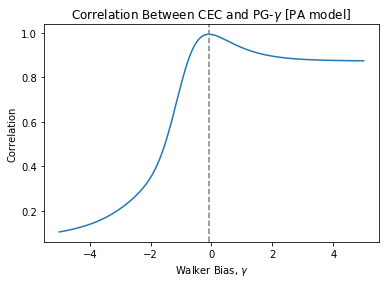

In [94]:
plt.plot(gamma_list, cec_pgrk_corr)
plt.axvline(gamma_list[np.argmax(cec_pgrk_corr)], linestyle = "--", color = "gray")
plt.ylabel("Correlation")
plt.xlabel("Walker Bias, $\gamma$")
plt.title("Correlation Between CEC and PG-$\gamma$ [PA model]")

### Generalisng to larger Graphs

In [95]:
from networkx import bipartite

def generate_pref_attach_hypergraph(N, scale_factor):
    # generate a random degree sequence
    print("="*20)
    deg_sequence = np.maximum(1, np.round(scale_factor*N*np.random.rand(N), 0).astype(int)) # nodes have least one connection
    start = time.time()
    G = bipartite.preferential_attachment_graph(deg_sequence, 0.1)
    print(time.time() - start)
    start = time.time()
    I = bipartite.biadjacency_matrix(G, row_order = range(len(list(deg_sequence)))).toarray()
    print(time.time() - start)
    #print("="*20)
    return I

def compute_centrality_measures(I, gamma, alpha):
    A = I @ I.T
    cec = compute_cec_ranking_power(A, 100)
    pgrk = find_pgrk(I, gamma, alpha)
    return cec, pgrk

def compute_correlation_cec_pgrk(num_list, gamma, alpha, scale_factor):
    corr_list = [0]*len(num_list)
    for idx in range(len(num_list)):
        #print(idx)
        N = num_list[idx]
        start = time.time()
        I = generate_pref_attach_hypergraph(N, scale_factor)
        #print(time.time() - start)
        start = time.time()
        cec, pgrk = compute_centrality_measures(I, gamma, alpha)
        #print(time.time() - start)
        corr_list[idx] = np.corrcoef(cec, pgrk)[0,1]
    return corr_list

In [96]:
num_list = np.logspace(1.2, 2.2, 30).astype(int)

gamma = -1 #  uniform

avgs = [[] for _ in range(len(num_list))]

for i in range(300):
    corr_hist = compute_correlation_cec_pgrk(num_list, gamma, 0.85, 0.2)
    for j in range(len(corr_hist)):
        if np.isnan(corr_hist[j]):
            pass
        else:
            avgs[j].append(corr_hist[j])
    print(i)
            
avgs_final1 = [np.mean(item) for item in avgs]

0.0
0.0009467601776123047
0.0
0.0
0.0
0.0009980201721191406
0.0
0.0
0.000997304916381836
0.0
0.0009975433349609375
0.0
0.0019953250885009766
0.0
0.0009975433349609375
0.0
0.0019941329956054688
0.0
0.0009975433349609375
0.0
0.0029916763305664062
0.0
0.003988742828369141
0.0
0.00498652458190918
0.0
0.00399017333984375
0.0
0.010970115661621094
0.0009980201721191406
0.014014720916748047
0.00099945068359375
0.01396489143371582
0.0009961128234863281
0.04384875297546387
0.0009968280792236328


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in reciprocal


0.06582427024841309
0.0019936561584472656
0.05385637283325195
0.0009968280792236328
0.10172820091247559
0.0019953250885009766
0.1625654697418213
0.0019948482513427734
0.1874988079071045
0.001994609832763672
0.2533233165740967
0.0019953250885009766
0.2503318786621094
0.002991914749145508
0.5615301132202148
0.0019941329956054688
0.6263570785522461
0.0019936561584472656
0.8707032203674316
0.0019941329956054688
1.3025176525115967
0.003988981246948242
2.0306005477905273
0.0039577484130859375
0
0.0009968280792236328
0.0
0.0009980201721191406
0.0
0.0009989738464355469
0.0
0.0009982585906982422
0.0
0.000997304916381836
0.0
0.000997304916381836
0.000997304916381836
0.001994609832763672
0.0
0.0019943714141845703
0.0
0.002991914749145508
0.0
0.002991914749145508
0.0
0.002991914749145508
0.0
0.005983829498291016
0.0009980201721191406
0.006981611251831055
0.0009970664978027344
0.005984067916870117
0.0009992122650146484
0.011969566345214844
0.0009965896606445312
0.017954111099243164
0.00099706649780

0.019948482513427734
0.0009958744049072266
0.0279238224029541
0.0019941329956054688
0.04388260841369629
0.0019953250885009766
0.054852962493896484
0.0019948482513427734
0.07081007957458496
0.0019941329956054688
0.13763141632080078
0.002991914749145508
0.24135422706604004
0.000997304916381836
0.21741819381713867
0.001995086669921875
0.3590395450592041
0.002991914749145508
0.6203403472900391
0.003989458084106445
0.5226354598999023
0.0019960403442382812
1.3564047813415527
0.0029604434967041016
1.442195177078247
0.0029921531677246094
2.5871191024780273
0.003985404968261719
5
0.000997781753540039
0.0
0.0
0.0009970664978027344
0.0009989738464355469
0.0
0.0
0.0009975433349609375
0.0009958744049072266
0.0009968280792236328
0.000997304916381836
0.0
0.0029916763305664062
0.0
0.0009970664978027344
0.0
0.0019936561584472656
0.0
0.002991914749145508
0.0009970664978027344
0.003989696502685547
0.0009989738464355469
0.0029921531677246094
0.0009975433349609375
0.005984306335449219
0.0
0.008977413177490

0.0249326229095459
0.000997304916381836
0.04587745666503906
0.000997304916381836
0.039891719818115234
0.0009975433349609375
0.052860260009765625
0.0009984970092773438
0.09773826599121094
0.0009982585906982422
0.1436161994934082
0.0009970664978027344
0.20046377182006836
0.0009975433349609375
0.261333703994751
0.0020024776458740234
0.3510622978210449
0.001993417739868164
0.4158897399902344
0.003991365432739258
0.4318819046020508
0.001993417739868164
0.9354972839355469
0.003988742828369141
1.5089657306671143
0.00498652458190918
1.586756944656372
0.00498652458190918
10
0.000997304916381836
0.0
0.0
0.0010292530059814453
0.0
0.0009970664978027344
0.0
0.0
0.0019941329956054688
0.0
0.0010290145874023438
0.0
0.000997781753540039
0.0009970664978027344
0.0029904842376708984
0.0009975433349609375
0.0020284652709960938
0.0
0.003988742828369141
0.0
0.004985332489013672
0.0
0.004987239837646484
0.0009968280792236328
0.00498509407043457
0.0
0.008974790573120117
0.0
0.012965679168701172
0.0009980201721

0.029921293258666992
0.0009970664978027344
0.027924776077270508
0.0
0.055850982666015625
0.0019948482513427734
0.04487967491149902
0.0009975433349609375
0.08377408981323242
0.0019953250885009766
0.13862967491149902
0.0019958019256591797
0.1845078468322754
0.0009975433349609375
0.20644855499267578
0.000997781753540039
0.2782576084136963
0.000997781753540039
0.5046517848968506
0.002990245819091797
0.47875261306762695
0.001992940902709961
1.0402696132659912
0.0029735565185546875
1.7154626846313477
0.0029914379119873047
1.972724199295044
0.0029921531677246094
15
0.0
0.0
0.0009965896606445312
0.0
0.0009975433349609375
0.0
0.0
0.0009965896606445312
0.0009965896606445312
0.0
0.0009975433349609375
0.0
0.0009980201721191406
0.0
0.001994609832763672
0.0
0.0019958019256591797
0.0009970664978027344
0.002992391586303711
0.0
0.005984067916870117
0.0009982585906982422
0.004985809326171875
0.0
0.008974552154541016
0.000997781753540039
0.009972572326660156
0.0009980201721191406
0.014959573745727539
0.0

0.012965679168701172
0.0009975433349609375
0.017952442169189453
0.0009963512420654297
0.03789782524108887
0.0
0.04886913299560547
0.001994609832763672
0.04986691474914551
0.0009968280792236328
0.09175467491149902
0.0009975433349609375
0.08976006507873535
0.001994609832763672
0.1715407371520996
0.000997781753540039
0.2543518543243408
0.0009975433349609375
0.4118995666503906
0.002992868423461914
0.549530029296875
0.0029921531677246094
0.5714726448059082
0.002992391586303711
1.1699073314666748
0.002987384796142578
1.0552098751068115
0.0029916763305664062
1.9627516269683838
0.004987001419067383
20
0.0009968280792236328
0.0
0.0
0.000997304916381836
0.0
0.0
0.000997304916381836
0.000997304916381836
0.0
0.000997781753540039
0.001994609832763672
0.0009975433349609375
0.001994609832763672
0.0
0.0009961128234863281
0.0
0.0029916763305664062
0.0
0.0019960403442382812
0.0009975433349609375
0.00299072265625
0.0009968280792236328
0.002991914749145508
0.000997781753540039
0.008975505828857422
0.00099

0.024931907653808594
0.000997781753540039
0.025930166244506836
0.000997781753540039
0.04986691474914551
0.001993894577026367
0.06582403182983398
0.0009982585906982422
0.07779216766357422
0.0019943714141845703
0.1376328468322754
0.0009968280792236328
0.20548605918884277
0.0009949207305908203
0.3281219005584717
0.0019948482513427734
0.3400914669036865
0.001995086669921875
0.4717371463775635
0.001995086669921875
0.711097002029419
0.0019948482513427734
0.7051486968994141
0.0019915103912353516
0.9425187110900879
0.0019927024841308594
2.167236328125
0.0039904117584228516
25
0.000997304916381836
0.0
0.0009968280792236328
0.0
0.0
0.000997304916381836
0.000997304916381836
0.0
0.0
0.000997304916381836
0.001994609832763672
0.0
0.001994609832763672
0.0
0.0029926300048828125
0.0
0.003988742828369141
0.0009987354278564453
0.0029916763305664062
0.0009970664978027344
0.003025531768798828
0.0
0.003989219665527344
0.0009975433349609375
0.006981372833251953
0.0
0.008974313735961914
0.000997304916381836
0

0.015956640243530273
0.001995086669921875
0.020943880081176758
0.000997781753540039
0.01695704460144043
0.000997304916381836
0.04188847541809082
0.0009970664978027344
0.0797872543334961
0.000997781753540039
0.11070370674133301
0.0019943714141845703
0.14760541915893555
0.0019948482513427734
0.21342968940734863
0.000997304916381836
0.21741843223571777
0.0029921531677246094
0.3869643211364746
0.000997304916381836
0.40595054626464844
0.001995563507080078
0.6442439556121826
0.003991365432739258
1.0372250080108643
0.002992868423461914
1.2437067031860352
0.0029904842376708984
2.2679858207702637
0.0029916763305664062
30
0.0
0.000997304916381836
0.0
0.000997304916381836
0.0009970664978027344
0.0009992122650146484
0.0009968280792236328
0.0
0.0009968280792236328
0.0009975433349609375
0.0010333061218261719
0.0009622573852539062
0.0009968280792236328
0.0
0.000997304916381836
0.000997304916381836
0.001994609832763672
0.0
0.004987001419067383
0.0
0.004987001419067383
0.000997304916381836
0.0049853324

0.016954421997070312
0.0
0.03490614891052246
0.00099945068359375
0.04587721824645996
0.001994609832763672
0.06682205200195312
0.001993417739868164
0.13164782524108887
0.0019948482513427734
0.1625659465789795
0.0009970664978027344
0.1456131935119629
0.003987550735473633
0.32213878631591797
0.0029935836791992188
0.41489243507385254
0.003987789154052734
0.564490795135498
0.000997304916381836
0.9345343112945557
0.002957582473754883
0.8557109832763672
0.002994537353515625
1.4211993217468262
0.0029921531677246094
2.319795608520508
0.002992391586303711
35
0.0
0.0009992122650146484
0.0009992122650146484
0.0
0.0
0.0
0.0009975433349609375
0.0
0.000997304916381836
0.0
0.0019927024841308594
0.0
0.0019953250885009766
0.0009980201721191406
0.001995563507080078
0.0009961128234863281
0.0029921531677246094
0.0
0.003989219665527344
0.0009987354278564453
0.0039904117584228516
0.0009963512420654297
0.004986763000488281
0.0009982585906982422
0.00897669792175293
0.0009992122650146484
0.007977962493896484
0.

0.015957117080688477
0.000997304916381836
0.01595926284790039
0.0009965896606445312
0.04887056350708008
0.0009965896606445312
0.05585050582885742
0.0009975433349609375
0.06482672691345215
0.000995635986328125
0.09474706649780273
0.0019943714141845703
0.12865424156188965
0.0019943714141845703
0.16755318641662598
0.0019953250885009766
0.251328706741333
0.001995086669921875
0.3151576519012451
0.0019927024841308594
0.44580912590026855
0.002992391586303711
0.8068909645080566
0.0019965171813964844
0.8098354339599609
0.0020360946655273438
1.3185038566589355
0.003003835678100586
1.8012146949768066
0.0029990673065185547
40
0.000997304916381836
0.000997304916381836
0.0009970664978027344
0.0
0.0
0.0009958744049072266
0.0009963512420654297
0.0
0.000997304916381836
0.0
0.0009970664978027344
0.0
0.0029897689819335938
0.0
0.001993417739868164
0.0009970664978027344
0.002991914749145508
0.0009980201721191406
0.0029921531677246094
0.0009965896606445312
0.00598454475402832
0.0009970664978027344
0.0069816

0.010970830917358398
0.000997304916381836
0.021940946578979492
0.000997781753540039
0.026927947998046875
0.0019943714141845703
0.030917644500732422
0.001996755599975586
0.0608372688293457
0.0009975433349609375
0.03789877891540527
0.0009965896606445312
0.07579708099365234
0.001994609832763672
0.1765272617340088
0.0029921531677246094
0.19447898864746094
0.0019936561584472656
0.2892270088195801
0.0029916763305664062
0.3071787357330322
0.002991914749145508
0.582442045211792
0.002992391586303711
0.8457393646240234
0.0039882659912109375
1.0122942924499512
0.002991914749145508
1.2426769733428955
0.003989696502685547
2.3876144886016846
0.0069811344146728516
3.353032112121582
0.007978200912475586
45
0.0009975433349609375
0.0
0.000997304916381836
0.0009970664978027344
0.0009970664978027344
0.0009970664978027344
0.0009970664978027344
0.0
0.001994609832763672
0.0
0.001994609832763672
0.0009975433349609375
0.001995086669921875
0.0009968280792236328
0.004987955093383789
0.0009958744049072266
0.00398

1.5917437076568604
0.0029909610748291016
2.375645637512207
0.005984306335449219
3.673175573348999
0.007978677749633789
49
0.0009982585906982422
0.0009963512420654297
0.0009968280792236328
0.0
0.0009980201721191406
0.0009970664978027344
0.0009975433349609375
0.0009968280792236328
0.0019948482513427734
0.0009970664978027344
0.0029916763305664062
0.000997781753540039
0.002991199493408203
0.0
0.0029916763305664062
0.0009980201721191406
0.00598597526550293
0.0019927024841308594
0.003989219665527344
0.000997304916381836
0.006981372833251953
0.000997304916381836
0.008976221084594727
0.000997304916381836
0.01196742057800293
0.0009975433349609375
0.022937774658203125
0.000997781753540039
0.02593064308166504
0.000997781753540039
0.019947528839111328
0.0009965896606445312
0.026931285858154297
0.0019948482513427734
0.0668187141418457
0.001995086669921875
0.09873604774475098
0.0029916763305664062
0.10970640182495117
0.0019953250885009766
0.15059709548950195
0.003989458084106445
0.22838926315307617


0.042885541915893555
0.001995086669921875
0.11369585990905762
0.0019943714141845703
0.13663482666015625
0.002992391586303711
0.18550539016723633
0.003988742828369141
0.24634075164794922
0.001994609832763672
0.32712554931640625
0.0019948482513427734
0.4158897399902344
0.003991603851318359
0.5874295234680176
0.0019941329956054688
0.8198075294494629
0.00399017333984375
1.2416784763336182
0.006981611251831055
1.6844940185546875
0.0059850215911865234
2.070462465286255
0.007979154586791992
4.787195444107056
0.007978439331054688
54
0.0009970664978027344
0.0
0.0009975433349609375
0.0
0.001994609832763672
0.0
0.0
0.0009963512420654297
0.0019948482513427734
0.000997781753540039
0.001994609832763672
0.0
0.002992868423461914
0.0009970664978027344
0.001993894577026367
0.0009982585906982422
0.002991914749145508
0.000997304916381836
0.004985809326171875
0.000997781753540039
0.008975505828857422
0.000997781753540039
0.00997304916381836
0.0009963512420654297
0.015958547592163086
0.0009980201721191406
0

0.006981849670410156
0.000997304916381836
0.01695561408996582
0.0019943714141845703
0.016953706741333008
0.0009975433349609375
0.022938966751098633
0.000997304916381836
0.013962984085083008
0.0009970664978027344
0.022939682006835938
0.000995635986328125
0.06283187866210938
0.0029921531677246094
0.06482791900634766
0.001993894577026367
0.15657997131347656
0.0029921531677246094
0.17752456665039062
0.002991914749145508
0.23038578033447266
0.0029904842376708984
0.25033068656921387
0.0019953250885009766
0.3919515609741211
0.0009968280792236328
0.5335731506347656
0.0029914379119873047
0.855710506439209
0.0019943714141845703
0.9883561134338379
0.002993345260620117
1.7034435272216797
0.004987478256225586
2.330766201019287
0.003989219665527344
3.277236223220825
0.007977485656738281
59
0.0009968280792236328
0.000997781753540039
0.0009970664978027344
0.0
0.0009975433349609375
0.0009970664978027344
0.001994609832763672
0.000997781753540039
0.000997781753540039
0.0009970664978027344
0.0009982585906

0.7310445308685303
0.0019948482513427734
0.818810224533081
0.002991199493408203
1.6176738739013672
0.005984067916870117
2.7147374153137207
0.005984067916870117
4.893910646438599
0.0059854984283447266
63
0.0009968280792236328
0.000997781753540039
0.0
0.000997304916381836
0.000997781753540039
0.000997304916381836
0.0019943714141845703
0.0
0.0009968280792236328
0.0
0.002991914749145508
0.0009970664978027344
0.0019953250885009766
0.0009970664978027344
0.004986763000488281
0.000997781753540039
0.004987239837646484
0.0009975433349609375
0.004986763000488281
0.0009980201721191406
0.009972810745239258
0.0009982585906982422
0.013962507247924805
0.000997781753540039
0.019946813583374023
0.0009975433349609375
0.023935556411743164
0.0019943714141845703
0.016953229904174805
0.000997781753540039
0.018949508666992188
0.0009975433349609375
0.06283140182495117
0.0019948482513427734
0.07280516624450684
0.0019948482513427734
0.10072946548461914
0.0019941329956054688
0.1156911849975586
0.00299239158630371

0.021941661834716797
0.0019941329956054688
0.019946813583374023
0.0019943714141845703
0.03490638732910156
0.0009970664978027344
0.028922319412231445
0.0019958019256591797
0.03690171241760254
0.0009975433349609375
0.05186104774475098
0.0029921531677246094
0.08278012275695801
0.0029914379119873047
0.13064980506896973
0.0029921531677246094
0.1655571460723877
0.003988981246948242
0.2014613151550293
0.001994609832763672
0.24334931373596191
0.001995563507080078
0.34407973289489746
0.0019943714141845703
0.6382932662963867
0.003989458084106445
0.6941394805908203
0.003989219665527344
0.9514572620391846
0.004984617233276367
1.310495376586914
0.0049860477447509766
1.9876840114593506
0.003989696502685547
2.7965211868286133
0.003989458084106445
68
0.0
0.0009975433349609375
0.0
0.0009975433349609375
0.000997304916381836
0.000997304916381836
0.000997304916381836
0.0009984970092773438
0.0019948482513427734
0.0
0.0
0.0009970664978027344
0.001994609832763672
0.0
0.004986763000488281
0.000997543334960937

2.5661370754241943
0.006981611251831055
2.8114798069000244
0.005984067916870117
72
0.0009970664978027344
0.000997304916381836
0.000997304916381836
0.000997781753540039
0.0009968280792236328
0.000997304916381836
0.001994609832763672
0.0009970664978027344
0.0019948482513427734
0.0009975433349609375
0.004987478256225586
0.0009968280792236328
0.001995086669921875
0.0009968280792236328
0.003989696502685547
0.0009980201721191406
0.003989219665527344
0.0009975433349609375
0.005984067916870117
0.0009975433349609375
0.006981372833251953
0.0009970664978027344
0.009973526000976562
0.0009968280792236328
0.01894974708557129
0.000997304916381836
0.020944595336914062
0.001994609832763672
0.012966156005859375
0.0009965896606445312
0.01495981216430664
0.0019948482513427734
0.04188799858093262
0.0019941329956054688
0.04587817192077637
0.0019936561584472656
0.06582403182983398
0.002992391586303711
0.08975934982299805
0.001995563507080078
0.17253923416137695
0.0029916763305664062
0.23337602615356445
0.000

0.07579755783081055
0.001994609832763672
0.12566471099853516
0.0029914379119873047
0.10172772407531738
0.0019948482513427734
0.12366962432861328
0.0019943714141845703
0.21442556381225586
0.0019953250885009766
0.2563149929046631
0.001995086669921875
0.4807143211364746
0.0019943714141845703
0.5335781574249268
0.0039861202239990234
0.8218023777008057
0.0019943714141845703
1.0920796394348145
0.0019941329956054688
1.6735239028930664
0.0039899349212646484
1.8769795894622803
0.00399017333984375
2.560153007507324
0.006981611251831055
77
0.0009963512420654297
0.0
0.0
0.0009975433349609375
0.0019948482513427734
0.0
0.0009968280792236328
0.000997781753540039
0.0019941329956054688
0.0
0.0019941329956054688
0.0009989738464355469
0.0019960403442382812
0.0009961128234863281
0.002992391586303711
0.0019943714141845703
0.003988981246948242
0.000997781753540039
0.006981849670410156
0.0009989738464355469
0.008976221084594727
0.0009980201721191406
0.006980419158935547
0.0019948482513427734
0.01296520233154

0.008976221084594727
0.0019953250885009766
0.012964248657226562
0.0019974708557128906
0.017950773239135742
0.0019941329956054688
0.027924060821533203
0.001995086669921875
0.02692437171936035
0.0019953250885009766
0.020943641662597656
0.0029926300048828125
0.024931669235229492
0.002992391586303711
0.06283164024353027
0.002991914749145508
0.056851863861083984
0.0029926300048828125
0.11967873573303223
0.0039882659912109375
0.10671615600585938
0.00299072265625
0.2124323844909668
0.004986286163330078
0.23038434982299805
0.005984067916870117
0.31116390228271484
0.0029921531677246094
0.28125
0.001995086669921875
0.38995814323425293
0.0029921531677246094
0.9125595092773438
0.008975028991699219
1.3703343868255615
0.0029900074005126953
0.908621072769165
0.001995086669921875
1.3483948707580566
0.001994609832763672
2.3357861042022705
0.0039904117584228516
82
0.0009968280792236328
0.0
0.0009975433349609375
0.0
0.000997304916381836
0.0
0.0
0.0
0.0
0.0009970664978027344
0.0009980201721191406
0.0
0.00

0.7320427894592285
0.0029921531677246094
1.1569058895111084
0.002991914749145508
1.9398117065429688
0.002992391586303711
2.445460557937622
0.002991914749145508
86
0.0009970664978027344
0.0
0.0
0.0
0.0
0.0009975433349609375
0.0
0.0
0.0009975433349609375
0.0
0.0009980201721191406
0.0009970664978027344
0.000997304916381836
0.0
0.0009970664978027344
0.0
0.003989458084106445
0.0
0.002992391586303711
0.0
0.003989219665527344
0.0
0.003988504409790039
0.000997304916381836
0.004987478256225586
0.0
0.008975744247436523
0.0009980201721191406
0.01296544075012207
0.000997304916381836
0.021941423416137695
0.000997304916381836
0.018949031829833984
0.001994609832763672
0.03391003608703613
0.001992940902709961
0.05485200881958008
0.0019943714141845703
0.05285906791687012
0.0019948482513427734
0.07978653907775879
0.002991199493408203
0.21941566467285156
0.003989696502685547
0.2682831287384033
0.004987239837646484
0.2842381000518799
0.0019943714141845703
0.6143577098846436
0.005982637405395508
0.49371600

0.03490757942199707
0.0009970664978027344
0.05186176300048828
0.0019948482513427734
0.08277702331542969
0.0019953250885009766
0.06283116340637207
0.001995086669921875
0.09474658966064453
0.0019948482513427734
0.12765789031982422
0.0029914379119873047
0.18650102615356445
0.001997232437133789
0.34810447692871094
0.0019943714141845703
0.34610748291015625
0.0019617080688476562
0.565488338470459
0.0019943714141845703
0.7819106578826904
0.0029916763305664062
1.00331711769104
0.0019948482513427734
1.1798443794250488
0.00399017333984375
2.133328914642334
0.0029916763305664062
91
0.0
0.0009975433349609375
0.00099945068359375
0.0
0.0
0.0009970664978027344
0.000997781753540039
0.0
0.0009961128234863281
0.0
0.0009975433349609375
0.0
0.0009968280792236328
0.0
0.0019931793212890625
0.0
0.0019943714141845703
0.0009975433349609375
0.001994609832763672
0.0009968280792236328
0.002992391586303711
0.000997781753540039
0.003024578094482422
0.0009644031524658203
0.007977485656738281
0.0
0.007978677749633789

0.01795029640197754
0.0009992122650146484
0.0249330997467041
0.0009975433349609375
0.03191375732421875
0.000997781753540039
0.04488110542297363
0.0009963512420654297
0.0937497615814209
0.001994609832763672
0.1077120304107666
0.0019943714141845703
0.14261937141418457
0.000997304916381836
0.18151330947875977
0.0019941329956054688
0.22539615631103516
0.001995086669921875
0.3092060089111328
0.000997781753540039
0.632307767868042
0.001995086669921875
0.7470369338989258
0.0019927024841308594
1.2307095527648926
0.0019948482513427734
1.2606611251831055
0.002000093460083008
2.3716588020324707
0.005983591079711914
96
0.0009968280792236328
0.0
0.0009968280792236328
0.0
0.0
0.0
0.0
0.0009965896606445312
0.001994609832763672
0.0
0.0009968280792236328
0.0
0.0009968280792236328
0.0009970664978027344
0.000997781753540039
0.0
0.0029921531677246094
0.0
0.003988981246948242
0.0
0.004988193511962891
0.0009958744049072266
0.006981611251831055
0.000997304916381836
0.003989458084106445
0.0009975433349609375


0.0009996891021728516
0.013962984085083008
0.0009975433349609375
0.03490710258483887
0.0019936561584472656
0.033910274505615234
0.0009968280792236328
0.12067914009094238
0.0009975433349609375
0.09374809265136719
0.001994609832763672
0.10970544815063477
0.001994609832763672
0.18849658966064453
0.0029914379119873047
0.22041082382202148
0.001993894577026367
0.3451120853424072
0.0019922256469726562
0.8048491477966309
0.007979869842529297
1.2077701091766357
0.007979869842529297
1.8480560779571533
0.0029921531677246094
1.1798787117004395
0.002990245819091797
2.200117349624634
0.004986763000488281
101
0.0009975433349609375
0.0
0.0009970664978027344
0.0
0.0
0.0
0.0009970664978027344
0.0
0.0009963512420654297
0.0
0.0019943714141845703
0.0
0.0019948482513427734
0.000997304916381836
0.001992940902709961
0.000997304916381836
0.001996278762817383
0.0
0.0029935836791992188
0.0
0.004987001419067383
0.0009970664978027344
0.005984067916870117
0.0009975433349609375
0.005984067916870117
0.000998735427856

0.021939516067504883
0.0009975433349609375
0.030916452407836914
0.0009968280792236328
0.04388260841369629
0.000997304916381836
0.040888309478759766
0.000997781753540039
0.09574341773986816
0.001995086669921875
0.1186819076538086
0.0019948482513427734
0.13563776016235352
0.000997304916381836
0.17453312873840332
0.001994609832763672
0.2712748050689697
0.0029921531677246094
0.36505889892578125
0.0019922256469726562
0.7370610237121582
0.001996755599975586
0.7640068531036377
0.001998424530029297
1.1659328937530518
0.002953767776489258
1.991706371307373
0.003957509994506836
106
0.0
0.0
0.0
0.0009968280792236328
0.000997781753540039
0.0009970664978027344
0.0009992122650146484
0.0
0.0009958744049072266
0.0009980201721191406
0.0009987354278564453
0.0
0.0009975433349609375
0.0009961128234863281
0.001994609832763672
0.0
0.0009984970092773438
0.0
0.001995086669921875
0.000995635986328125
0.0029942989349365234
0.0
0.004954814910888672
0.0009965896606445312
0.004986286163330078
0.000997304916381836


0.018950462341308594
0.0
0.0359039306640625
0.000997781753540039
0.04089093208312988
0.0009970664978027344
0.05684828758239746
0.0009970664978027344
0.07579612731933594
0.0009982585906982422
0.1077117919921875
0.0009970664978027344
0.13862943649291992
0.002992391586303711
0.2124326229095459
0.000997781753540039
0.40395402908325195
0.0019826889038085938
0.5126643180847168
0.001994609832763672
0.5175833702087402
0.002028226852416992
0.9733953475952148
0.0029921531677246094
1.255676031112671
0.005951404571533203
1.7523448467254639
0.0029942989349365234
111
0.0009975433349609375
0.0
0.0009958744049072266
0.0
0.0
0.000997304916381836
0.0009970664978027344
0.0
0.000997781753540039
0.0
0.0009970664978027344
0.0
0.000997304916381836
0.0
0.0009970664978027344
0.0009975433349609375
0.0029926300048828125
0.0009975433349609375
0.0029914379119873047
0.000997781753540039
0.0029921531677246094
0.000997304916381836
0.004987001419067383
0.0
0.0049860477447509766
0.000997781753540039
0.01000595092773437

0.011967658996582031
0.001995086669921875
0.011967658996582031
0.0009951591491699219
0.018953800201416016
0.0019910335540771484
0.02493143081665039
0.000997304916381836
0.01894974708557129
0.0009958744049072266
0.034906864166259766
0.001995086669921875
0.07679510116577148
0.001994609832763672
0.08178067207336426
0.0029914379119873047
0.11968064308166504
0.0029909610748291016
0.1266613006591797
0.0029921531677246094
0.215423583984375
0.0029921531677246094
0.33310985565185547
0.0019941329956054688
0.34607458114624023
0.001994609832763672
0.4966721534729004
0.0029914379119873047
0.6632282733917236
0.00299072265625
1.035231351852417
0.0029921531677246094
1.4670770168304443
0.003988981246948242
2.2649431228637695
0.0049855709075927734
2.680830478668213
0.004986286163330078
116
0.0009949207305908203
0.000997304916381836
0.001995086669921875
0.0009970664978027344
0.0009968280792236328
0.0009975433349609375
0.001995086669921875
0.0
0.0019948482513427734
0.0
0.0019948482513427734
0.000998020172

0.5614988803863525
0.0019943714141845703
1.0282506942749023
0.002992868423461914
1.8081634044647217
0.004987955093383789
1.636622667312622
0.004986763000488281
3.473710060119629
0.007978200912475586
120
0.0
0.0009970664978027344
0.0009970664978027344
0.0
0.0009970664978027344
0.000997781753540039
0.000997781753540039
0.0009968280792236328
0.0029914379119873047
0.0
0.0019943714141845703
0.0009975433349609375
0.001995086669921875
0.0
0.003989219665527344
0.000997781753540039
0.00498652458190918
0.000997304916381836
0.0069811344146728516
0.0009975433349609375
0.00498652458190918
0.000997304916381836
0.009973526000976562
0.0009975433349609375
0.020943880081176758
0.000997781753540039
0.01695418357849121
0.000997304916381836
0.023936986923217773
0.0019943714141845703
0.01994609832763672
0.000997781753540039
0.047872066497802734
0.001994609832763672
0.08178091049194336
0.001995086669921875
0.07978677749633789
0.002992391586303711
0.14960002899169922
0.0029926300048828125
0.10671496391296387


0.013962507247924805
0.0009970664978027344
0.018949031829833984
0.000997781753540039
0.023935794830322266
0.0
0.026928424835205078
0.0009970664978027344
0.034906625747680664
0.001995563507080078
0.054853200912475586
0.001995086669921875
0.09674358367919922
0.0019931793212890625
0.1436152458190918
0.0019948482513427734
0.1436164379119873
0.002991914749145508
0.17553067207336426
0.001995086669921875
0.25830960273742676
0.0019943714141845703
0.40990400314331055
0.000997304916381836
0.4996635913848877
0.0019941329956054688
0.8776504993438721
0.003989458084106445
0.9155511856079102
0.003989458084106445
1.293539047241211
0.0029921531677246094
2.210089683532715
0.006981849670410156
3.5345520973205566
0.00797271728515625
125
0.0009970664978027344
0.0
0.0009975433349609375
0.0009970664978027344
0.0009970664978027344
0.000997781753540039
0.0009975433349609375
0.000997304916381836
0.0009970664978027344
0.0009980201721191406
0.0029926300048828125
0.0
0.001995086669921875
0.000997304916381836
0.002

1.8460626602172852
0.005984783172607422
2.8653366565704346
0.006982088088989258
129
0.0009975433349609375
0.000997781753540039
0.001995086669921875
0.0009980201721191406
0.0
0.000997304916381836
0.000997304916381836
0.000997304916381836
0.0009987354278564453
0.0009965896606445312
0.0019948482513427734
0.0
0.0019943714141845703
0.000997781753540039
0.001995563507080078
0.000997304916381836
0.0069811344146728516
0.000997781753540039
0.008975982666015625
0.000997781753540039
0.009973526000976562
0.0009968280792236328
0.007978200912475586
0.001994609832763672
0.011968135833740234
0.0009968280792236328
0.018948793411254883
0.001994609832763672
0.015957355499267578
0.0019953250885009766
0.01795220375061035
0.001994609832763672
0.05186128616333008
0.002991914749145508
0.04587721824645996
0.0029935836791992188
0.11469364166259766
0.002991914749145508
0.08776521682739258
0.001994609832763672
0.1655580997467041
0.002991914749145508
0.17453336715698242
0.002992868423461914
0.28324198722839355
0.0

0.0029921531677246094
0.08577132225036621
0.0029921531677246094
0.10970616340637207
0.002992391586303711
0.2323777675628662
0.002993345260620117
0.19547748565673828
0.0029916763305664062
0.2234029769897461
0.0029916763305664062
0.42087388038635254
0.003989458084106445
0.5804476737976074
0.0029914379119873047
0.6432793140411377
0.003991127014160156
1.05418062210083
0.0029916763305664062
1.2955348491668701
0.004987001419067383
2.0983879566192627
0.008976936340332031
3.4368109703063965
0.005982160568237305
134
0.000997304916381836
0.0009975433349609375
0.000997304916381836
0.000997304916381836
0.0009982585906982422
0.0
0.0009975433349609375
0.000997781753540039
0.0019948482513427734
0.0009975433349609375
0.0039899349212646484
0.0009968280792236328
0.001993894577026367
0.0009975433349609375
0.003988504409790039
0.0
0.004987001419067383
0.0009968280792236328
0.004986763000488281
0.000997304916381836
0.012965202331542969
0.0009975433349609375
0.00797891616821289
0.0009975433349609375
0.01396

0.001994609832763672
0.01695561408996582
0.0009970664978027344
0.01994609832763672
0.001994609832763672
0.021940946578979492
0.000997304916381836
0.02094292640686035
0.0009975433349609375
0.043881893157958984
0.0019948482513427734
0.056847572326660156
0.001995086669921875
0.10671448707580566
0.0019948482513427734
0.09275245666503906
0.001995086669921875
0.15358948707580566
0.0029921531677246094
0.1874988079071045
0.0029921531677246094
0.23337531089782715
0.0019943714141845703
0.33311009407043457
0.002991199493408203
0.45478343963623047
0.0019958019256591797
0.7190773487091064
0.004987239837646484
1.0701370239257812
0.001994609832763672
1.3673431873321533
0.005983829498291016
1.8041746616363525
0.003988742828369141
2.8094851970672607
0.004987001419067383
139
0.0009975433349609375
0.0009975433349609375
0.0009968280792236328
0.00099945068359375
0.0009970664978027344
0.0
0.000997304916381836
0.0009989738464355469
0.0019931793212890625
0.0009970664978027344
0.001994609832763672
0.0009975433

0.7300477027893066
0.0039904117584228516
1.0212693214416504
0.003989219665527344
1.9697320461273193
0.006981849670410156
1.9118857383728027
0.004986763000488281
2.9531033039093018
0.004986286163330078
143
0.0
0.0009968280792236328
0.0009970664978027344
0.0
0.0009984970092773438
0.0009965896606445312
0.001995563507080078
0.0
0.0009975433349609375
0.0009965896606445312
0.0019943714141845703
0.0009970664978027344
0.0019948482513427734
0.0009984970092773438
0.0029921531677246094
0.0009968280792236328
0.005983829498291016
0.000997304916381836
0.00399017333984375
0.0009968280792236328
0.007979154586791992
0.000997304916381836
0.006981372833251953
0.000997304916381836
0.011967897415161133
0.0009968280792236328
0.010969877243041992
0.0009975433349609375
0.02593064308166504
0.0019948482513427734
0.01795196533203125
0.0009984970092773438
0.026928186416625977
0.001995086669921875
0.04388260841369629
0.0019943714141845703
0.07280564308166504
0.0019965171813964844
0.10172772407531738
0.001994848251

0.020943880081176758
0.0019948482513427734
0.026927947998046875
0.0009975433349609375
0.04388284683227539
0.001995086669921875
0.050863027572631836
0.0019943714141845703
0.06981420516967773
0.0009968280792236328
0.09474635124206543
0.0019948482513427734
0.15558409690856934
0.003991603851318359
0.31116509437561035
0.003988742828369141
0.4418201446533203
0.002991914749145508
0.9833683967590332
0.002991914749145508
0.3939807415008545
0.0019609928131103516
0.6303145885467529
0.0029926300048828125
1.1409494876861572
0.0029926300048828125
1.6555707454681396
0.003023386001586914
2.339784622192383
0.0030050277709960938
148
0.0009996891021728516
0.0009951591491699219
0.0009970664978027344
0.0
0.000997781753540039
0.0
0.000997304916381836
0.000997304916381836
0.0009975433349609375
0.0
0.0019927024841308594
0.0
0.0009970664978027344
0.0
0.0009970664978027344
0.0
0.001996278762817383
0.0
0.002991914749145508
0.0009970664978027344
0.006981372833251953
0.0009970664978027344
0.0059854984283447266
0.0

0.00897669792175293
0.0019941329956054688
0.012964487075805664
0.001993894577026367
0.014960527420043945
0.001994609832763672
0.011968851089477539
0.0029904842376708984
0.0109710693359375
0.0009975433349609375
0.013965368270874023
0.000995635986328125
0.023932933807373047
0.0009980201721191406
0.052858829498291016
0.0019943714141845703
0.04787182807922363
0.0009975433349609375
0.07280540466308594
0.000997781753540039
0.05984187126159668
0.001992940902709961
0.09574317932128906
0.001993417739868164
0.1575770378112793
0.0029921531677246094
0.18849587440490723
0.0029938220977783203
0.31116700172424316
0.0019960403442382812
0.29920077323913574
0.0009975433349609375
0.5475339889526367
0.002028226852416992
0.6981334686279297
0.0020279884338378906
1.1170127391815186
0.002992391586303711
1.5698018074035645
0.004987239837646484
3.566465139389038
0.011966943740844727
153
0.0009975433349609375
0.0009970664978027344
0.0019948482513427734
0.0009980201721191406
0.000997304916381836
0.000997066497802

0.5954089164733887
0.0019941329956054688
0.49471092224121094
0.0019931793212890625
1.013289213180542
0.0029914379119873047
1.570833683013916
0.0029904842376708984
2.0944323539733887
0.0029921531677246094
157
0.0
0.000997781753540039
0.0
0.0
0.0
0.0009970664978027344
0.0
0.0009992122650146484
0.000997304916381836
0.0
0.0009975433349609375
0.0
0.0029921531677246094
0.000997781753540039
0.0009975433349609375
0.0009958744049072266
0.0019927024841308594
0.0
0.003989219665527344
0.0
0.006983041763305664
0.0
0.0019948482513427734
0.0009975433349609375
0.0069811344146728516
0.0009992122650146484
0.010969400405883789
0.0009963512420654297
0.01695704460144043
0.0009958744049072266
0.02094411849975586
0.0009975433349609375
0.023937225341796875
0.0019931793212890625
0.03390908241271973
0.0009970664978027344
0.058840036392211914
0.0019948482513427734
0.0997323989868164
0.0009980201721191406
0.11668801307678223
0.0029921531677246094
0.1855030059814453
0.0019958019256591797
0.1356372833251953
0.00199

0.050864219665527344
0.002991199493408203
0.06382894515991211
0.002991914749145508
0.07081007957458496
0.002991914749145508
0.1356351375579834
0.0039899349212646484
0.14860153198242188
0.0039904117584228516
0.18649911880493164
0.001995086669921875
0.16954684257507324
0.0019943714141845703
0.2653229236602783
0.0019941329956054688
0.3261280059814453
0.0009975433349609375
0.4109010696411133
0.0019948482513427734
0.7749283313751221
0.0029921531677246094
1.0033178329467773
0.001994609832763672
1.406240701675415
0.0029916763305664062
2.18615460395813
0.003989219665527344
162
0.0
0.0009970664978027344
0.0009975433349609375
0.0
0.0
0.0
0.0
0.0
0.000997781753540039
0.0009987354278564453
0.0009970664978027344
0.000997781753540039
0.0019943714141845703
0.0
0.0009982585906982422
0.0009965896606445312
0.0029904842376708984
0.000997304916381836
0.001993894577026367
0.0
0.003988981246948242
0.0
0.003990650177001953
0.0009968280792236328
0.007979869842529297
0.0009961128234863281
0.013964176177978516


0.01595759391784668
0.0009982585906982422
0.024932861328125
0.000997304916381836
0.030916690826416016
0.000997304916381836
0.03889632225036621
0.000997304916381836
0.04188823699951172
0.0009965896606445312
0.06283140182495117
0.0009975433349609375
0.11967968940734863
0.001995086669921875
0.2044520378112793
0.000997304916381836
0.2483358383178711
0.001995086669921875
0.34009265899658203
0.0019941329956054688
0.47871923446655273
0.00598454475402832
1.430176019668579
0.008975505828857422
2.1652064323425293
0.0029938220977783203
1.104048252105713
0.0019943714141845703
2.262948751449585
0.0030448436737060547
167
0.000997304916381836
0.0
0.0
0.0
0.0
0.0
0.0009982585906982422
0.0
0.0009968280792236328
0.0
0.0019948482513427734
0.0
0.0009968280792236328
0.0009989738464355469
0.001996278762817383
0.0
0.0019948482513427734
0.0009989738464355469
0.00498652458190918
0.0
0.00498652458190918
0.0009970664978027344
0.005984306335449219
0.0009970664978027344
0.005982875823974609
0.0009984970092773438
0

0.0249326229095459
0.000997781753540039
0.029919862747192383
0.000997304916381836
0.04388260841369629
0.0009982585906982422
0.05983924865722656
0.0019948482513427734
0.09973406791687012
0.001993894577026367
0.13463997840881348
0.002991914749145508
0.1186821460723877
0.001995563507080078
0.17553281784057617
0.0009970664978027344
0.3430817127227783
0.0009975433349609375
0.43187761306762695
0.001997709274291992
0.6303138732910156
0.001994609832763672
0.5455734729766846
0.002994060516357422
0.8347980976104736
0.0019626617431640625
1.5289440155029297
0.002991914749145508
2.3826284408569336
0.003989696502685547
172
0.0
0.0009970664978027344
0.000997304916381836
0.0
0.0009975433349609375
0.0
0.000997304916381836
0.0009989738464355469
0.000997304916381836
0.0009970664978027344
0.001995086669921875
0.0
0.0009953975677490234
0.0
0.0009989738464355469
0.0
0.0019936561584472656
0.0009975433349609375
0.0019958019256591797
0.0
0.00598454475402832
0.0009951591491699219
0.003989219665527344
0.0
0.0109

0.0009965896606445312
0.023936033248901367
0.0
0.023935794830322266
0.000997304916381836
0.039893388748168945
0.0009965896606445312
0.057845354080200195
0.001993894577026367
0.07779264450073242
0.0019948482513427734
0.11469125747680664
0.001994609832763672
0.15558457374572754
0.001993894577026367
0.2154557704925537
0.0019960403442382812
0.4059159755706787
0.002992391586303711
0.5096371173858643
0.002991914749145508
0.6702091693878174
0.002991914749145508
1.0332691669464111
0.0019605159759521484
1.4551093578338623
0.003989696502685547
2.037586212158203
0.0029883384704589844
177
0.0
0.0
0.0009970664978027344
0.0
0.0
0.000997781753540039
0.0009968280792236328
0.0
0.000997304916381836
0.0009970664978027344
0.0009636878967285156
0.0
0.0
0.0
0.0009975433349609375
0.0009975433349609375
0.0009965896606445312
0.0009970664978027344
0.001993894577026367
0.0009975433349609375
0.0029914379119873047
0.0
0.005982398986816406
0.0
0.0069811344146728516
0.0009970664978027344
0.011968851089477539
0.00099

0.016956090927124023
0.000997304916381836
0.045877695083618164
0.0009975433349609375
0.054851531982421875
0.0019948482513427734
0.05086469650268555
0.0009982585906982422
0.08676600456237793
0.001995086669921875
0.09873557090759277
0.000997781753540039
0.1884937286376953
0.000997304916381836
0.1934814453125
0.0019948482513427734
0.34108924865722656
0.0019981861114501953
0.5266244411468506
0.001994609832763672
0.633307695388794
0.001994609832763672
0.9993274211883545
0.002027273178100586
1.861023187637329
0.0030007362365722656
1.715411901473999
0.002991914749145508
182
0.0009975433349609375
0.0
0.0009984970092773438
0.0
0.0
0.0
0.0
0.0009975433349609375
0.0010304450988769531
0.0
0.000997304916381836
0.0
0.0009970664978027344
0.0
0.0019948482513427734
0.0
0.0019960403442382812
0.0
0.0029909610748291016
0.0009970664978027344
0.0019953250885009766
0.0
0.002991914749145508
0.0
0.0069811344146728516
0.0009975433349609375
0.009973764419555664
0.0
0.006981372833251953
0.0009975433349609375
0.02

0.01894855499267578
0.0
0.03390908241271973
0.000997304916381836
0.041887760162353516
0.0009970664978027344
0.04188942909240723
0.0019936561584472656
0.0797879695892334
0.0019931793212890625
0.0937490463256836
0.000997304916381836
0.13962650299072266
0.0009970664978027344
0.30721068382263184
0.0010013580322265625
0.35709643363952637
0.0019991397857666016
0.5285873413085938
0.002992391586303711
0.6961729526519775
0.001995086669921875
0.7180793285369873
0.002991914749145508
1.7612905502319336
0.002993345260620117
2.0096590518951416
0.0029969215393066406
187
0.0009968280792236328
0.0
0.0
0.0009958744049072266
0.000997304916381836
0.0
0.0009975433349609375
0.0
0.000997781753540039
0.0
0.0
0.0009975433349609375
0.0
0.0
0.0039882659912109375
0.0
0.00099945068359375
0.0
0.0029916763305664062
0.0
0.001995086669921875
0.0009961128234863281
0.004986763000488281
0.0
0.010972261428833008
0.0009958744049072266
0.005984067916870117
0.0
0.016956329345703125
0.000997304916381836
0.03091883659362793
0.

0.022937536239624023
0.0
0.049866437911987305
0.0019943714141845703
0.04388284683227539
0.0009970664978027344
0.04787254333496094
0.0019941329956054688
0.10172796249389648
0.0019943714141845703
0.15558457374572754
0.0019941329956054688
0.20844221115112305
0.0019948482513427734
0.2343742847442627
0.002992391586303711
0.39095401763916016
0.0019948482513427734
0.528618574142456
0.0019953250885009766
0.6822097301483154
0.0029599666595458984
0.8158693313598633
0.0029420852661132812
1.1938087940216064
0.004986286163330078
1.5169439315795898
0.002991914749145508
192
0.0009975433349609375
0.000997304916381836
0.000997304916381836
0.0009961128234863281
0.000997304916381836
0.00099945068359375
0.0
0.0
0.0009975433349609375
0.0009970664978027344
0.001995086669921875
0.0
0.0009634494781494141
0.0
0.0009975433349609375
0.0009975433349609375
0.0019943714141845703
0.0
0.0009975433349609375
0.000997781753540039
0.0009963512420654297
0.0
0.002991914749145508
0.0010292530059814453
0.00399017333984375
0.

0.017952680587768555
0.0009984970092773438
0.02293872833251953
0.0009970664978027344
0.040891170501708984
0.0009968280792236328
0.05086374282836914
0.000997781753540039
0.09075713157653809
0.000997781753540039
0.14062285423278809
0.0009980201721191406
0.18450617790222168
0.0019941329956054688
0.19547700881958008
0.001994609832763672
0.3840045928955078
0.0009982585906982422
0.5046834945678711
0.0019936561584472656
0.5265927314758301
0.0019948482513427734
1.0442073345184326
0.002991914749145508
1.3953182697296143
0.002994060516357422
2.2250993251800537
0.002995014190673828
197
0.000997304916381836
0.0
0.0009992122650146484
0.0
0.0009639263153076172
0.0
0.000997304916381836
0.0
0.000997304916381836
0.0
0.0009970664978027344
0.0
0.000997304916381836
0.0
0.000997304916381836
0.0009970664978027344
0.003989219665527344
0.0009975433349609375
0.0029921531677246094
0.0
0.003989458084106445
0.0009975433349609375
0.003989696502685547
0.0009970664978027344
0.007976770401000977
0.0
0.007978916168212

0.0009958744049072266
0.03191566467285156
0.0
0.022937774658203125
0.0009961128234863281
0.03590536117553711
0.001993417739868164
0.05285835266113281
0.0009970664978027344
0.09873390197753906
0.0009980201721191406
0.08676624298095703
0.0009975433349609375
0.2154231071472168
0.000997781753540039
0.2373650074005127
0.002027750015258789
0.3610341548919678
0.0019948482513427734
0.3909871578216553
0.0019953250885009766
0.7061111927032471
0.0039899349212646484
0.7610175609588623
0.001992940902709961
0.9435281753540039
0.001993417739868164
1.9298908710479736
0.0029921531677246094
202
0.0009965896606445312
0.000997304916381836
0.0009958744049072266
0.0
0.0009975433349609375
0.0
0.0009975433349609375
0.0
0.001995086669921875
0.0
0.0009992122650146484
0.0009953975677490234
0.0009965896606445312
0.0
0.002992391586303711
0.0
0.000995635986328125
0.0
0.0029914379119873047
0.0009963512420654297
0.0019943714141845703
0.000997304916381836
0.001995086669921875
0.0
0.006981849670410156
0.0
0.01396203041

0.018950462341308594
0.0009970664978027344
0.024932384490966797
0.0
0.05385732650756836
0.001993417739868164
0.06083536148071289
0.0019943714141845703
0.12566399574279785
0.0019948482513427734
0.12765860557556152
0.0019948482513427734
0.13862895965576172
0.0029921531677246094
0.31815028190612793
0.001994609832763672
0.3341059684753418
0.0019948482513427734
0.4438462257385254
0.0020003318786621094
0.6801812648773193
0.0039899349212646484
0.9195401668548584
0.0029926300048828125
1.528911828994751
0.0039904117584228516
1.741342306137085
0.004986763000488281
207
0.0009970664978027344
0.000997781753540039
0.0009965896606445312
0.0
0.0
0.000997304916381836
0.0009975433349609375
0.0
0.0009970664978027344
0.000997781753540039
0.0019948482513427734
0.0009968280792236328
0.000997304916381836
0.0
0.001994609832763672
0.0
0.0009970664978027344
0.0
0.005983829498291016
0.0
0.006981372833251953
0.0
0.0069811344146728516
0.000997304916381836
0.010971546173095703
0.0
0.0059850215911865234
0.0009970664

0.013962745666503906
0.0009970664978027344
0.03789830207824707
0.000997781753540039
0.044879913330078125
0.000997304916381836
0.07080984115600586
0.0019953250885009766
0.10871005058288574
0.0019943714141845703
0.15259122848510742
0.001995086669921875
0.14860272407531738
0.0019948482513427734
0.24634075164794922
0.0009975433349609375
0.42586255073547363
0.0009975433349609375
0.4298853874206543
0.0019919872283935547
0.507643461227417
0.0029921531677246094
0.8577048778533936
0.0019941329956054688
1.2715985774993896
0.0029921531677246094
1.9628016948699951
0.003990650177001953
212
0.0009975433349609375
0.0009975433349609375
0.0
0.0
0.0
0.0009970664978027344
0.0
0.0
0.0009987354278564453
0.0
0.000997304916381836
0.0
0.0
0.0009970664978027344
0.0029938220977783203
0.0
0.002990245819091797
0.0
0.003987312316894531
0.0
0.003988742828369141
0.0009958744049072266
0.0019936561584472656
0.0009975433349609375
0.004986286163330078
0.0009975433349609375
0.006943941116333008
0.0009970664978027344
0.00

0.02991962432861328
0.000997304916381836
0.02692699432373047
0.0009980201721191406
0.03091716766357422
0.0009970664978027344
0.04787254333496094
0.0019941329956054688
0.09474611282348633
0.000997304916381836
0.13563823699951172
0.001994609832763672
0.15658020973205566
0.002992391586303711
0.23936009407043457
0.0019943714141845703
0.25830912590026855
0.0019943714141845703
0.4249093532562256
0.0019807815551757812
0.6084070205688477
0.001994609832763672
1.1160461902618408
0.0029921531677246094
1.3962304592132568
0.00498652458190918
1.9927051067352295
0.00395655632019043
217
0.0009975433349609375
0.0
0.0
0.0009968280792236328
0.0
0.0
0.0
0.0
0.0
0.0
0.0009970664978027344
0.0
0.0009968280792236328
0.0009975433349609375
0.001994609832763672
0.0009975433349609375
0.0019948482513427734
0.0
0.002990245819091797
0.0
0.00797891616821289
0.0009992122650146484
0.005984783172607422
0.0
0.004987001419067383
0.0009975433349609375
0.012963533401489258
0.0
0.012965202331542969
0.0009968280792236328
0.01

0.0009970664978027344
0.026928186416625977
0.0009975433349609375
0.036900997161865234
0.000997304916381836
0.06183433532714844
0.0009970664978027344
0.0718080997467041
0.0009970664978027344
0.0967409610748291
0.0019960403442382812
0.20245862007141113
0.000997304916381836
0.22041106224060059
0.001994609832763672
0.373002290725708
0.002992391586303711
0.37100911140441895
0.002992391586303711
0.6423203945159912
0.0019922256469726562
0.9355490207672119
0.002939462661743164
0.9584717750549316
0.001995563507080078
1.917921543121338
0.0029909610748291016
222
0.0
0.0009953975677490234
0.0
0.0009961128234863281
0.0009970664978027344
0.0
0.0009970664978027344
0.0
0.0009987354278564453
0.000997304916381836
0.0
0.0009975433349609375
0.0009975433349609375
0.0
0.0009992122650146484
0.0
0.002992391586303711
0.000997304916381836
0.0039899349212646484
0.0
0.0039899349212646484
0.0
0.007978200912475586
0.0009975433349609375
0.003988742828369141
0.000997304916381836
0.008975982666015625
0.0
0.00997281074

0.013962984085083008
0.000997304916381836
0.02992105484008789
0.001993894577026367
0.04288601875305176
0.000997304916381836
0.04787182807922363
0.000997304916381836
0.09374880790710449
0.001994609832763672
0.10970711708068848
0.000997304916381836
0.18550348281860352
0.000997304916381836
0.26632118225097656
0.0009958744049072266
0.3321115970611572
0.002025604248046875
0.3979678153991699
0.0019948482513427734
0.5455734729766846
0.0019948482513427734
0.8926441669464111
0.0019941329956054688
1.2357454299926758
0.0019936561584472656
2.1901745796203613
0.0029942989349365234
227
0.000997304916381836
0.0
0.0
0.0
0.0009970664978027344
0.0
0.0
0.0
0.0
0.0009975433349609375
0.000997781753540039
0.0
0.0009639263153076172
0.0
0.0009975433349609375
0.0
0.0009975433349609375
0.000997304916381836
0.0029926300048828125
0.0
0.005983114242553711
0.0009984970092773438
0.0019941329956054688
0.0009980201721191406
0.003991365432739258
0.0010302066802978516
0.007977724075317383
0.0009975433349609375
0.0129654

0.02593088150024414
0.0009970664978027344
0.06682157516479492
0.0009970664978027344
0.04886913299560547
0.0009970664978027344
0.05086374282836914
0.0009965896606445312
0.10771036148071289
0.0019953250885009766
0.1575784683227539
0.000997781753540039
0.2812488079071045
0.0019965171813964844
0.4029560089111328
0.0009965896606445312
0.5475735664367676
0.0019898414611816406
0.7470388412475586
0.0019919872283935547
1.076171636581421
0.002993345260620117
1.1938586235046387
0.0019767284393310547
1.9039418697357178
0.00395965576171875
232
0.0009975433349609375
0.0
0.0
0.0010383129119873047
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0009970664978027344
0.0019941329956054688
0.0
0.0009975433349609375
0.0009968280792236328
0.0009968280792236328
0.0010385513305664062
0.0019943714141845703
0.000997781753540039
0.002991914749145508
0.0009975433349609375
0.003989458084106445
0.0009975433349609375
0.007978677749633789
0.000997304916381836
0.011967658996582031
0.000997781753540039
0.011968135833740234
0.00099754333

0.020943403244018555
0.0009989738464355469
0.030916690826416016
0.0009982585906982422
0.03390908241271973
0.0009970664978027344
0.04986715316772461
0.0009963512420654297
0.08477354049682617
0.0009970664978027344
0.12067699432373047
0.0019943714141845703
0.15558266639709473
0.0019943714141845703
0.27526283264160156
0.0019953250885009766
0.325131893157959
0.0029921531677246094
0.43782901763916016
0.0019948482513427734
0.5874626636505127
0.0019919872283935547
0.8796820640563965
0.001992940902709961
1.4800424575805664
0.0029916763305664062
1.9737727642059326
0.002991914749145508
237
0.0
0.0009975433349609375
0.0
0.000997304916381836
0.0
0.0009970664978027344
0.0
0.0009980201721191406
0.0009975433349609375
0.0009975433349609375
0.000997304916381836
0.0
0.002991914749145508
0.0009968280792236328
0.0019941329956054688
0.0
0.002991914749145508
0.0
0.003991127014160156
0.0
0.0029921531677246094
0.0009968280792236328
0.004987001419067383
0.0009975433349609375
0.008975505828857422
0.0
0.008974790

0.008976459503173828
0.000997304916381836
0.015956640243530273
0.0
0.01795220375061035
0.0009968280792236328
0.023936986923217773
0.0009980201721191406
0.04787135124206543
0.000997304916381836
0.05485272407531738
0.000997304916381836
0.10272479057312012
0.0009975433349609375
0.14760422706604004
0.000997304916381836
0.18251371383666992
0.000997304916381836
0.17553257942199707
0.003987312316894531
0.3421177864074707
0.0019948482513427734
0.5286192893981934
0.0019922256469726562
0.4777553081512451
0.0019953250885009766
0.9694521427154541
0.002959728240966797
1.314483880996704
0.0029938220977783203
1.9747183322906494
0.004986763000488281
242
0.0
0.0009982585906982422
0.0009970664978027344
0.0
0.000997304916381836
0.0
0.000997304916381836
0.0
0.0009951591491699219
0.0009975433349609375
0.0
0.0009965896606445312
0.0029921531677246094
0.0
0.0009970664978027344
0.0009980201721191406
0.0019943714141845703
0.0
0.003988981246948242
0.0
0.003989696502685547
0.0
0.004988431930541992
0.0009975433349

0.03690171241760254
0.001995086669921875
0.019946575164794922
0.0009975433349609375
0.05086398124694824
0.0009980201721191406
0.06781792640686035
0.0009975433349609375
0.09773945808410645
0.0019943714141845703
0.15658092498779297
0.0019953250885009766
0.14860153198242188
0.0019953250885009766
0.2184162139892578
0.000997304916381836
0.3231368064880371
0.002991914749145508
0.5365662574768066
0.001994609832763672
0.5994307994842529
0.001994609832763672
0.825824499130249
0.0030074119567871094
1.3514189720153809
0.0029909610748291016
1.791243553161621
0.003009796142578125
247
0.0
0.0
0.0009970664978027344
0.0
0.0
0.0
0.0009975433349609375
0.0
0.0009961128234863281
0.0
0.001994609832763672
0.0
0.000997781753540039
0.0
0.001996278762817383
0.0
0.0029931068420410156
0.0
0.001995086669921875
0.0009970664978027344
0.001995086669921875
0.000997781753540039
0.0059850215911865234
0.0
0.007978677749633789
0.0009970664978027344
0.008975744247436523
0.00099945068359375
0.009972572326660156
0.000998020

0.021941423416137695
0.000997304916381836
0.04089093208312988
0.0
0.03391003608703613
0.0009968280792236328
0.0608370304107666
0.0009970664978027344
0.0967411994934082
0.0019981861114501953
0.1326448917388916
0.0019943714141845703
0.18051767349243164
0.0019943714141845703
0.198469877243042
0.0009968280792236328
0.39295101165771484
0.0019943714141845703
0.3859686851501465
0.001994609832763672
0.44783854484558105
0.0019936561584472656
1.0302443504333496
0.002991914749145508
1.1040470600128174
0.002992391586303711
1.8311541080474854
0.003940582275390625
252
0.0
0.0009975433349609375
0.0
0.00099945068359375
0.0009970664978027344
0.0
0.0
0.0009968280792236328
0.0009992122650146484
0.0
0.0009970664978027344
0.0
0.0019941329956054688
0.0
0.0009636878967285156
0.0009965896606445312
0.0009975433349609375
0.0009975433349609375
0.0009970664978027344
0.000997781753540039
0.006981611251831055
0.0009970664978027344
0.004984855651855469
0.000997781753540039
0.005982637405395508
0.0009970664978027344


0.029920339584350586
0.0009975433349609375
0.04887032508850098
0.000997304916381836
0.08377552032470703
0.000997781753540039
0.07779216766357422
0.001994609832763672
0.14162111282348633
0.001994609832763672
0.18550419807434082
0.001993894577026367
0.22539734840393066
0.001995086669921875
0.4837076663970947
0.0029926300048828125
0.5445785522460938
0.0020046234130859375
0.5465378761291504
0.001994609832763672
0.8367960453033447
0.0019941329956054688
1.529907464981079
0.00498652458190918
1.9278452396392822
0.004987239837646484
257
0.0009980201721191406
0.0
0.000997304916381836
0.0
0.0
0.0
0.0
0.000997781753540039
0.0009970664978027344
0.0
0.000995635986328125
0.0
0.000997304916381836
0.0
0.001994609832763672
0.0009975433349609375
0.002991914749145508
0.0
0.0019948482513427734
0.0009965896606445312
0.0019936561584472656
0.0
0.004987001419067383
0.0
0.005984067916870117
0.0009968280792236328
0.0069811344146728516
0.0
0.006980180740356445
0.0009968280792236328
0.029921531677246094
0.00099706

0.019945621490478516
0.0009968280792236328
0.0359039306640625
0.000997304916381836
0.06283235549926758
0.001994609832763672
0.0548553466796875
0.025928497314453125
0.09773898124694824
0.0009970664978027344
0.14561033248901367
0.001995086669921875
0.17752528190612793
0.0029926300048828125
0.21442675590515137
0.001995563507080078
0.29720544815063477
0.001995086669921875
0.4228692054748535
0.001995086669921875
0.5695109367370605
0.0019953250885009766
1.1998238563537598
0.0019981861114501953
1.3623573780059814
0.002991914749145508
1.650587558746338
0.0029909610748291016
262
0.0
0.0009958744049072266
0.0
0.0009965896606445312
0.0009965896606445312
0.0
0.0
0.0
0.0009975433349609375
0.0
0.0009970664978027344
0.0
0.001994609832763672
0.0009968280792236328
0.0009970664978027344
0.0
0.002992391586303711
0.0009965896606445312
0.0029935836791992188
0.0
0.0029916763305664062
0.000997781753540039
0.004988193511962891
0.0
0.007978200912475586
0.000997781753540039
0.0069806575775146484
0.0
0.008975982

0.01695418357849121
0.0009975433349609375
0.03390955924987793
0.0009975433349609375
0.08975982666015625
0.0009970664978027344
0.06382894515991211
0.0009982585906982422
0.05884265899658203
0.0009984970092773438
0.10671615600585938
0.0009958744049072266
0.15558338165283203
0.001995086669921875
0.20644807815551758
0.0029921531677246094
0.3420860767364502
0.0029916763305664062
0.5275890827178955
0.001994609832763672
0.5405550003051758
0.002035379409790039
1.019275426864624
0.003989458084106445
1.2876091003417969
0.0019969940185546875
2.1193313598632812
0.004986763000488281
267
0.000997304916381836
0.0
0.000997304916381836
0.0
0.0
0.0009653568267822266
0.0
0.000997781753540039
0.0
0.000997304916381836
0.0009975433349609375
0.0
0.0019941329956054688
0.0
0.002992868423461914
0.0
0.0019931793212890625
0.0009970664978027344
0.004987001419067383
0.0
0.003989219665527344
0.0
0.003990888595581055
0.0
0.006979703903198242
0.000997304916381836
0.009974241256713867
0.0009968280792236328
0.01196908950

0.03689980506896973
0.001994609832763672
0.04188823699951172
0.000997304916381836
0.046874046325683594
0.0009982585906982422
0.09973311424255371
0.0019943714141845703
0.15059781074523926
0.0019943714141845703
0.13962697982788086
0.0019943714141845703
0.21742033958435059
0.001993894577026367
0.264324426651001
0.001994609832763672
0.4108693599700928
0.0029916763305664062
0.6692111492156982
0.0029921531677246094
0.9704372882843018
0.0029914379119873047
1.3394560813903809
0.002988100051879883
1.8301045894622803
0.004987001419067383
272
0.0
0.0
0.0
0.0
0.0009975433349609375
0.0
0.000997304916381836
0.0
0.0009975433349609375
0.0009968280792236328
0.001994609832763672
0.000997781753540039
0.0009970664978027344
0.0009975433349609375
0.0019948482513427734
0.0
0.002991914749145508
0.0009975433349609375
0.004987001419067383
0.0009970664978027344
0.005983591079711914
0.0
0.004987001419067383
0.0009975433349609375
0.00797891616821289
0.000997304916381836
0.008975505828857422
0.0
0.01695442199707031

0.023936033248901367
0.0009968280792236328
0.04487943649291992
0.0009975433349609375
0.03889632225036621
0.000997304916381836
0.059841156005859375
0.0019941329956054688
0.0967409610748291
0.0019943714141845703
0.07779145240783691
0.0009975433349609375
0.16356229782104492
0.0009968280792236328
0.26931262016296387
0.000997304916381836
0.3421180248260498
0.0019609928131103516
0.6153557300567627
0.002991914749145508
0.6752293109893799
0.001992940902709961
1.0611639022827148
0.001994609832763672
1.5748388767242432
0.0039386749267578125
2.288846015930176
0.006981611251831055
277
0.000997304916381836
0.0
0.0
0.0009984970092773438
0.0
0.0
0.0009996891021728516
0.0
0.0009984970092773438
0.0
0.001994609832763672
0.0
0.000997304916381836
0.0009970664978027344
0.0009958744049072266
0.0
0.003987789154052734
0.0009970664978027344
0.0029921531677246094
0.0009992122650146484
0.0049855709075927734
0.0009980201721191406
0.003990888595581055
0.000997781753540039
0.002991914749145508
0.0
0.011966228485107

0.027925729751586914
0.0009968280792236328
0.05385589599609375
0.0019953250885009766
0.05385565757751465
0.000997781753540039
0.05884218215942383
0.0
0.07679533958435059
0.001994609832763672
0.10372376441955566
0.0009968280792236328
0.13663530349731445
0.0019948482513427734
0.21442651748657227
0.0019953250885009766
0.29920077323913574
0.0009975433349609375
0.4189326763153076
0.0020003318786621094
0.563525915145874
0.0019965171813964844
0.7849366664886475
0.0019927024841308594
0.9834034442901611
0.004986763000488281
2.0495517253875732
0.003968238830566406
282
0.0009970664978027344
0.0
0.0
0.000997304916381836
0.000997304916381836
0.0009992122650146484
0.0
0.0009975433349609375
0.001031637191772461
0.0
0.0019943714141845703
0.0
0.0009980201721191406
0.0009965896606445312
0.0019941329956054688
0.0
0.0019943714141845703
0.0
0.0019941329956054688
0.0
0.003989458084106445
0.0
0.004986286163330078
0.0009992122650146484
0.004985332489013672
0.0009970664978027344
0.011968851089477539
0.00099945

0.028923749923706055
0.000997304916381836
0.05186152458190918
0.0009975433349609375
0.07878994941711426
0.001994609832763672
0.10870981216430664
0.0009982585906982422
0.16156768798828125
0.0019941329956054688
0.15957260131835938
0.0009968280792236328
0.2263960838317871
0.000997304916381836
0.3869664669036865
0.001994609832763672
0.5874290466308594
0.001994609832763672
0.7001614570617676
0.001996755599975586
0.6951093673706055
0.001994609832763672
1.283618688583374
0.0019440650939941406
1.9228942394256592
0.0019905567169189453
287
0.0009968280792236328
0.000997781753540039
0.0
0.0009987354278564453
0.0009975433349609375
0.0009975433349609375
0.0
0.0009975433349609375
0.0
0.0
0.0009989738464355469
0.0009953975677490234
0.001995086669921875
0.0
0.0019941329956054688
0.0
0.0009982585906982422
0.0
0.0019948482513427734
0.0
0.0039882659912109375
0.0009975433349609375
0.0029916763305664062
0.0
0.003987550735473633
0.0009980201721191406
0.005983591079711914
0.000997304916381836
0.0119695663452

0.015957117080688477
0.0009984970092773438
0.0279238224029541
0.0009975433349609375
0.04288530349731445
0.000997304916381836
0.05884194374084473
0.0009970664978027344
0.07779145240783691
0.0009970664978027344
0.11369538307189941
0.0009975433349609375
0.17253828048706055
0.0019948482513427734
0.24434852600097656
0.0029916763305664062
0.4747302532196045
0.001994609832763672
0.3391263484954834
0.0009965896606445312
0.6273725032806396
0.001976490020751953
0.9613966941833496
0.0029921531677246094
1.1479454040527344
0.002978086471557617
1.9537758827209473
0.003989458084106445
292
0.0
0.000995635986328125
0.000997304916381836
0.000997304916381836
0.0
0.0
0.0
0.000997304916381836
0.0009970664978027344
0.000997304916381836
0.0010192394256591797
0.0
0.000997304916381836
0.0
0.0019943714141845703
0.0
0.0029544830322265625
0.0
0.003987789154052734
0.000997304916381836
0.005018472671508789
0.0009660720825195312
0.003987312316894531
0.000997781753540039
0.003987789154052734
0.0009970664978027344
0.0

0.03989267349243164
0.000997781753540039
0.0388951301574707
0.0019948482513427734
0.04787111282348633
0.001995563507080078
0.06981348991394043
0.001995086669921875
0.12765908241271973
0.0019943714141845703
0.16356277465820312
0.0019948482513427734
0.1934823989868164
0.001994609832763672
0.3420863151550293
0.0029916763305664062
0.5515265464782715
0.0029921531677246094
0.6562442779541016
0.003989696502685547
0.9205887317657471
0.002966165542602539
1.2456698417663574
0.001995086669921875
2.3766448497772217
0.004987239837646484
297
0.0
0.0009989738464355469
0.0009975433349609375
0.0
0.0009975433349609375
0.0
0.0009639263153076172
0.0
0.0009639263153076172
0.0
0.0
0.0009951591491699219
0.0
0.0009987354278564453
0.001992940902709961
0.0
0.0029921531677246094
0.0
0.002993345260620117
0.0
0.005983829498291016
0.0009975433349609375
0.00498652458190918
0.0
0.006979465484619141
0.000997304916381836
0.007976770401000977
0.0
0.013962745666503906
0.000997304916381836
0.015957117080688477
0.0
0.01894

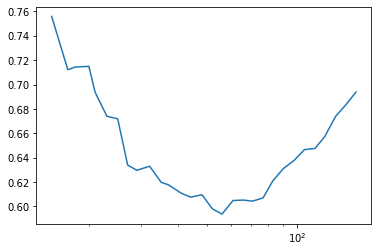

In [98]:
plt.semilogx(num_list, avgs_final1)

In [101]:
#######################################################################################
# WARNING: Takes very long to run due to inefficiency of NetworkX Graph generator
#######################################################################################


num_list = np.logspace(2.3, 2.8, 5).astype(int)

corr_hist = {}
for num in num_list:
    corr_hist[num] = []
for i in range(3):
    for num in num_list:
        corr_hist[num].append(compute_correlation_cec_pgrk([num], gamma, 0.85, 0.2))
    print("Completed iteration: " + str(i))

5.667842864990234
0.004986763000488281


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in reciprocal


27.572249174118042
0.011968135833740234
143.20998287200928
0.02194070816040039
1048.4714827537537
0.07081127166748047
4570.527747631073
0.11566019058227539
Completed iteration: 0
6.698087215423584
0.006979942321777344
32.85517740249634
0.008959770202636719
177.43045854568481
0.024934053421020508
944.1728534698486
0.07579874992370605
4766.5839240550995
0.10771369934082031
Completed iteration: 1
6.76091742515564
0.0059854984283447266
27.536386251449585
0.050832271575927734
159.08153319358826
0.02393651008605957
925.0050799846649
0.03288149833679199
5389.012724399567
0.10770869255065918
Completed iteration: 2


In [102]:
# saving the data

import pickle

with open("data/cec_uniform_preferential_attachment_data.pkl", "wb") as f:
    pickle.dump(corr_hist, f)

In [105]:
corr_hist2 = [np.mean(item) for item in corr_hist]

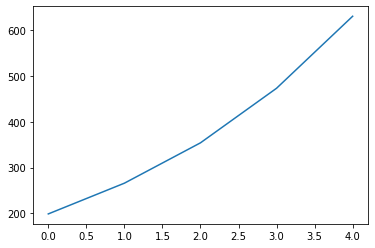

In [106]:
plt.plot(corr_hist2)

In [107]:
corr_hist

{199: [[0.773218801041009], [0.7533620483819233], [0.7270493123204139]],
 266: [[0.774704699918047], [0.7417405738614422], [0.7419255675506212]],
 354: [[0.8200201029243048], [0.7726083785517558], [0.7972164075384582]],
 473: [[0.8366009845504391], [0.818249126076721], [0.8215111107300672]],
 630: [[0.8615622271353982], [0.8317576523277573], [0.8693599134226834]]}

In [181]:
num_list = np.logspace(2.3, 3, 10).astype(int)

gamma = -1 #  uniform

avgs = [[] for _ in range(len(num_list))]

corr_hist = compute_correlation_cec_pgrk(num_list, gamma, 0.85, 0.2)
for j in range(len(corr_hist)):
    if np.isnan(corr_hist[j]):
        pass
    else:
        avgs[j].append(corr_hist[j])

avgs_final2 = [np.mean(item) for item in avgs]

6.170496702194214
0.005984306335449219


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in reciprocal


15.977267265319824
0.008977890014648438
45.908228635787964
0.011968612670898438
127.75607633590698
0.015957355499267578
348.0333480834961
0.024933338165283203
969.914984703064
0.03585338592529297


KeyboardInterrupt: 